In [1]:
from epftoolbox.data import read_data
from epftoolbox.models import DNN, evaluate_dnn_in_test_dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
dataset, pjm_test = read_data('..\\..\\data\\epftoolbox\\NP', dataset='PJM', years_test=0, begin_test_date=None, end_test_date=None)
dataset

,Price,Exogenous 1,Exogenous 2
Date,,,
2013-01-01 00:00:00,25.464211,85049.0,11509.0
2013-01-01 01:00:00,23.554578,82128.0,10942.0
2013-01-01 02:00:00,22.122277,80729.0,10639.0
2013-01-01 03:00:00,21.592066,80248.0,10476.0
2013-01-01 04:00:00,21.546501,80850.0,10445.0
...,...,...,...
2018-12-24 19:00:00,29.761473,94939.0,11246.0
2018-12-24 20:00:00,27.897676,94035.0,11070.0
2018-12-24 21:00:00,26.405903,92923.0,10963.0


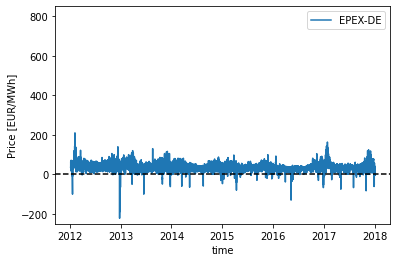

In [14]:
name = 'DE'
dataset, _ = read_data(f'..\\..\\data\\epftoolbox\\{name}', dataset=name, years_test=0, begin_test_date=None, end_test_date=None)
plt.figure()
plt.plot(dataset['Price'])
plt.axhline(y = 0, color = 'black', linestyle = 'dashed')
plt.ylim([-250, 850])
plt.xlabel('time')
plt.ylabel('Price [EUR/MWh]')
plt.legend(['EPEX-DE'])
plt.savefig('..\\..\\report\\images\\DE-price.pdf', bbox_inches="tight")

In [ ]:
model = DNN(
    experiment_id=1, path_hyperparameter_folder='..\\..\\epftoolbox\\examples\\experimental_files', nlayers=2,
    dataset='PJM', years_test=2, shuffle_train=True, data_augmentation=0,
    calibration_window=4)
data_available = pd.concat([pjm_train_val, pjm_test], axis=0)
# model.predict(pjm_test.loc[pjm_test.index[1000] - pd.Timedelta(weeks=2):, :])
# model.recalibrate_and_forecast_next_day(df=data_available, next_day_date='27/12/2016')
# pjm_test.index[0]
evaluate_dnn_in_test_dataset(1, path_hyperparameter_folder='..\\..\\epftoolbox\\examples\\experimental_files',
                               path_datasets_folder='..\\..\\data\\epftoolbox\\PJM', shuffle_train=True,
                               path_recalibration_folder='..\\..\\epftoolbox\\examples\\experimental_files',
                               new_recalibration=True,
                               begin_test_date='27/12/2016',
                               end_test_date='27/12/2017')

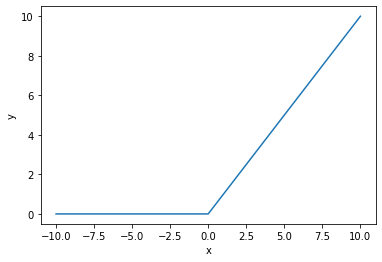

In [6]:
x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)
plt.figure()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('..\\..\\report\\images\\relu.pdf', bbox_inches="tight")